<a href="https://colab.research.google.com/github/antonionipo/Data-Science-Camp-Projects/blob/main/Predict_energy_consumption/Predict_energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Energy Consumptun

*Data Science Camp*

Imagine living in a house where every single watt of electricity you use is meticulously recorded, each of which contributes to a vast pool of data. By analyzing this detailed household power consumption data recorded over nearly 4 years, an energy company can help customers achieve sustainable energy usage while balancing their energy generation. With predictive models, the company can optimize energy usage, forecast future consumption, and provide tailored recommendations. Your task is to use this dataset to build a model that predicts power consumption, benefiting both the energy provider and its  customers.

Project Instructions
Predict daily power_consumption by experimenting with various supervised regression models trained on the training dataset.

Evaluate their performance on the test dataset by measuring their Root Mean Squared Error (RMSE).

Save the lowest RMSE achieved on the test set as a numeric variable selected_rmse, which should not be greater than 450 kW.
Plot the power_consumption predictions and actual daily power_consumption for the test dataset and assess whether the predictions follow a similar trend as the original data.

Save your answer "Yes" or "No" as a string variable trend_similarity

Instalar Bibliotecas

In [10]:
!pip install xgboost

Importar bibliotecas

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb

Ler CSVs com bases de treino e teste

In [12]:
# Read training and testing data from CSV files
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

Entendimento de dados

In [13]:
# Display structure of the training data
df_train.head()

,date,power_consumption,year,semester,quarter,day_in_week,week_in_year,day_in_year,month
0,12/16/2006,1209.176,2006,2,4,Sat,50,350,12
1,12/17/2006,3390.460,2006,2,4,Sun,51,351,12
2,12/18/2006,2203.826,2006,2,4,Mon,51,352,12
3,12/19/2006,1666.194,2006,2,4,Tue,51,353,12
4,12/20/2006,2225.748,2006,2,4,Wed,51,354,12


Separar em treino e teste as variáveis dependentes e independentes

In [14]:
# Convert 'date' column to Date type and 'day_in_week' column to factor in both datasets

# Convert 'date' column to datetime objects
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

# Convert 'day_in_week' to categorical data type
df_train['day_in_week'] = pd.Categorical(df_train['day_in_week'])
df_test['day_in_week'] = pd.Categorical(df_test['day_in_week'])

Tratamento de variáveis categóricas

In [15]:
# Convert categorical variable 'day_in_week' to indicator variables using one-hot encoding in both datasets

# Create dummy variables for 'day_in_week' in both datasets
day_in_week_dummies_train = pd.get_dummies(df_train['day_in_week'], prefix='day')
day_in_week_dummies_test = pd.get_dummies(df_test['day_in_week'], prefix='day')

# Combine dummy variables with original datasets
df_train = pd.concat([df_train, day_in_week_dummies_train], axis=1)
df_test = pd.concat([df_test, day_in_week_dummies_test], axis=1)

# Remove the original 'day_in_week' column
df_train = df_train.drop('day_in_week', axis=1)
df_test = df_test.drop('day_in_week', axis=1)


Tratamento de dados

In [19]:
# Separate features and target variable for both training and testing datasets
train_x = df_train.drop(columns=['power_consumption', 'date'])
train_y = df_train['power_consumption']
test_x = df_test.drop(columns=['power_consumption', 'date'])
test_y = df_test['power_consumption']

Modelos

In [20]:
# Linear Regression
lm_model = LinearRegression()
lm_model.fit(train_x, train_y)
lm_pred = lm_model.predict(test_x)
lm_rmse = np.sqrt(mean_squared_error(test_y, lm_pred))

# Random Forest
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42) # Added random_state for reproducibility
rf_model.fit(train_x, train_y)
rf_pred = rf_model.predict(test_x)
rf_rmse = np.sqrt(mean_squared_error(test_y, rf_pred))

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=500, objective="reg:squarederror", eta=0.1, max_depth=1, random_state=42) # Added random_state
xgb_model.fit(train_x, train_y)
xgb_pred = xgb_model.predict(test_x)
xgb_rmse = np.sqrt(mean_squared_error(test_y, xgb_pred))

Comparação de modelos

In [21]:
# Create a DataFrame for RMSE scores
rmse_df = pd.DataFrame({
    'Model': ["Linear Regression", "Random Forest", "XGBoost"],
    'RMSE': [lm_rmse, rf_rmse, xgb_rmse]
})

# Get the lowest RMSE and assign it to selected_rmse
selected_rmse = min(lm_rmse, rf_rmse, xgb_rmse)
print(f"selected_rmse: {selected_rmse} kW")


selected_rmse: 403.5422712170373 kW


Predição de modelo

In [22]:
# Add predictions to the test dataset for plotting
df_test['Predicted'] = rf_pred

Plot

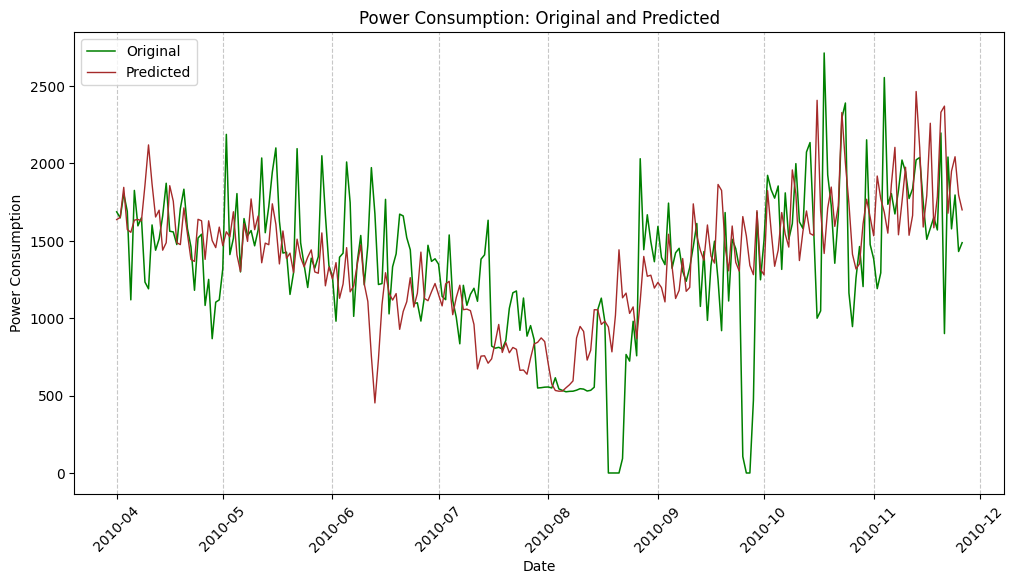

trend_similarity: Yes


In [23]:
# Plot actual vs predicted power consumption
plt.figure(figsize=(12, 6))
plt.plot(df_test['date'], df_test['power_consumption'], color="green", linewidth=1.1, label='Original')
plt.plot(df_test['date'], df_test['Predicted'], color="brown", linewidth=1, label='Predicted')
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.title("Power Consumption: Original and Predicted")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, axis='x', linestyle='--', alpha=0.7) # Added gridlines for better readability


plt.show()

trend_similarity = "Yes"  # or "No" based on visual inspection of the plot
print("trend_similarity:", trend_similarity)
